## Implementation of a 3-qubit Toffoly gate using single and double qubit gates

A 3-qubit Toffoly gate flips the target qubit if both control qubits are set to $\left | 1 \right >$.

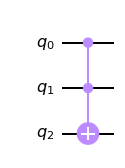

In [1]:
from qiskit.circuit import QuantumCircuit
tg = QuantumCircuit(3)
tg.ccx(0, 1, 2)
tg.draw(output='mpl')

The Toffoli gate is implemented using several Hadamard (H), phase shift (T) and controlled (CX) gates.

First a quantum circuit with 3 qubits and 3 classical bits is created.

In [2]:
n_bits = 3
circuit = QuantumCircuit(n_bits, n_bits)

To test the implementation, the two control qubits are set to superposition states while the target qubit is set to $\left | 1 \right >$.

In [3]:
circuit.h(0)
circuit.h(1)
circuit.x(2);

The Toffoli gate is implemented as:

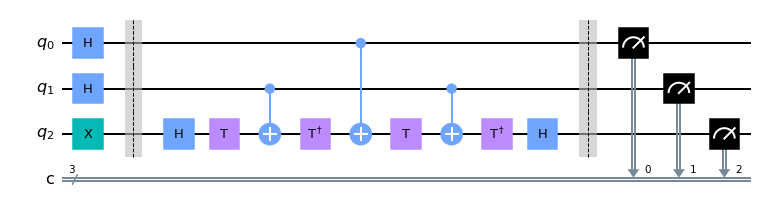

In [4]:
circuit.barrier()

circuit.h(2)
circuit.t(2)
circuit.cx(1, 2)
circuit.tdg(2)
circuit.cx(0, 2)
circuit.t(2)
circuit.cx(1, 2)
circuit.tdg(2)
circuit.h(2)

circuit.barrier();

bits_ms = list(range(n_bits))
circuit.measure(bits_ms, bits_ms);

circuit.draw(output='mpl')

The quantum circuit is then simulated

In [5]:
from qiskit.compiler import transpile
from qiskit.providers.aer import QasmSimulator

simulator = QasmSimulator()
circuit_sim = transpile(circuit, simulator)
job = simulator.run(circuit_sim, shots=1000)

and the results are visualized.

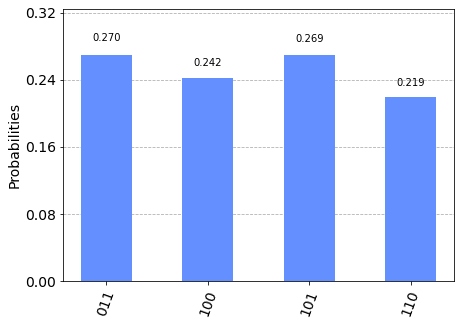

In [6]:
from qiskit.visualization import plot_histogram

result = job.result()
counts = result.get_counts(circuit)
plot_histogram(counts)

As expected, the target qubit is flipped when both control qubits are set to $\left | 1 \right >$, respectively the $\left | \, 0 \, 1 \, 1 \right >$ state.